Generate a mixed signal containing 50 Hz, 1023 Hz and 1735 Hz and some random noise. Design a band pass filter to remove the low frequency and high frequency signal keeping only the 1023 Hz signal. Show original signal, designed filter frequency response, filtered signal and Fourier spectrum of the original and filtered signals in plot.

In [1]:
from scipy import signal
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_sample=512         #Number of samples
fs=10000             #Sampling frequency
dt =1/fs             # inter sample time = 0.0001s = 10kHz sampling
t = np.arange(0, N_sample)*dt # time vector

In [3]:
## Create signal vector that is the sum of 50 Hz, 1023 Hz, and 1735 Hz
Signal =np.sin(2*np.pi*50*t) +np.sin(2*np.pi*1023*t)+np.sin(2*np.pi*1735*t) 

##Add random noise to the signal
Signal =Signal+np.random.normal(0, .1, Signal.shape) 


In [4]:
#Select design  Specification
fstop_L=500                #Lower stopband frequency in Hz
fpass_L=800                 #Lower passband frequency in HZ
fstop_U=1500                #Upper stopband frequency in Hz
fpass_U=1200                #Upper passband frequency in HZ

In [5]:
#Calculations
del_f1=abs(fpass_L-fstop_L)/fs    #Normalized lower transition band w.r.t. fs
del_f2=abs(fpass_U-fstop_U)/fs     ##Normalized upper transition band w.r.t. fs

In [6]:
N1=3.3/del_f1       #Filter length using selected window based on Normalized lower transition band
N2=3.3/del_f2       #Filter length using selected window based on Normalized upper transition band

print('Filter length based on lower transition band:', N1)
print('Filter length based on upper transition band:', N2)


Filter length based on lower transition band: 110.0
Filter length based on upper transition band: 110.0


In [7]:
#Select length as the maximum of the N1 and N2 and if it is even, make it next higher integer
N=int(np.ceil(max(N1,N2)))
if(N%2==0):
  N=N+1
print('Selected filter length :', N)

Selected filter length : 111


In [8]:
#Calculate lower and uper cut-off frequencies
fL=(fstop_L+fpass_L)/2             #Lower cut-off frequency in Hz
fU=(fstop_U+fpass_U)/2             #Upper cut-off frequency in Hz
wL=2*fL/fs                         #Normalized Lower cut-off frequency in (w/pi) rad          
wU=2*fU/fs                         #Normalized upper cut-off frequency in (w/pi) rad 
cutoff=np.array([wL, wU])                    #Cutoff frequency array

In [11]:
##Since the given specification of Stopband attenuation = 50 dB and Passband ripple = 0.05 dB, atleast satisfy with
##Hamming window, we have to choose it.

##Determine Filter coefficients
b_ham= signal.firwin(N,cutoff,window="hamming",pass_zero="bandpass")     #Call filter design function using Hamming window

##Determine Frequency response of the filters
w,h_ham = signal.freqz(b_ham,a=1)                       #Calculate response h at specified frequency points w for Hamming window

#Calculate Magnitude in dB
h_dB_ham =20*np.log10(abs(h_ham))                   #Calculate magnitude in decibels 

In [13]:
a=[1]
#Filter the noisy signal by designed filter using signal.filtfilt
filtOut=signal.filtfilt(b_ham,a,Signal)

Text(0.5, 1.0, 'Noisy signal')

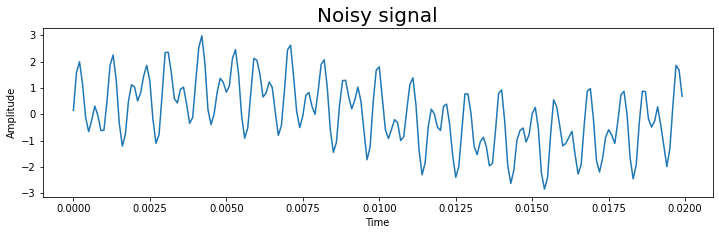

In [14]:
##Plot filter magnitude and phase responses using subplot. Digital frequency w converted in analog frequency
fig = plt.figure(figsize=(12, 18))

##Original signal
sub1 = plt.subplot(5, 1, 1)
sub1.plot(t[0:200],Signal[0:200])
sub1.set_ylabel('Amplitude')
sub1.set_xlabel('Time')
sub1.set_title('Noisy signal', fontsize=20)


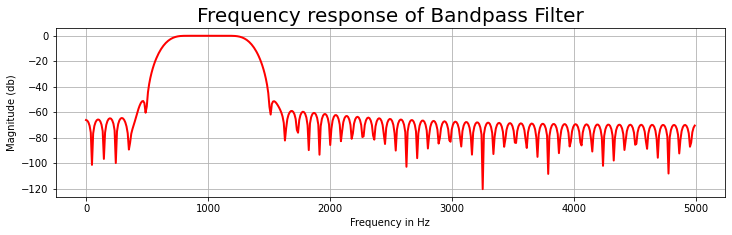

In [17]:
fig = plt.figure(figsize=(12, 18))
##Magnitude response Plot
sub2 = plt.subplot(5, 1, 2)
sub2.plot(w*fs/(2*np.pi),h_dB_ham,'r', label='Bandpass filter', linewidth='2')           #Plot for magnitude response window 
sub2.set_ylabel('Magnitude (db)')
sub2.set_xlabel('Frequency in Hz')
sub2.set_title('Frequency response of Bandpass Filter', fontsize=20)
sub2.axis=([0,  fs/2,  -110,  5])
sub2.grid()

Text(0.5, 1.0, 'Filtered output of Band pass Filter')

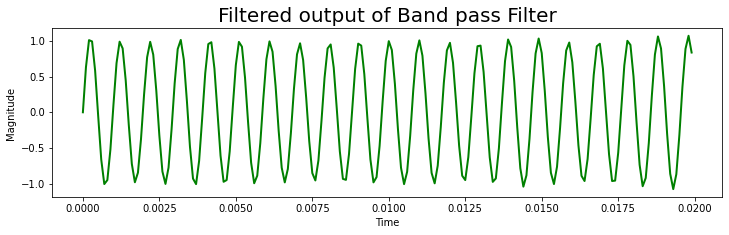

In [16]:
fig = plt.figure(figsize=(12, 18))
sub3 = plt.subplot(5, 1, 3)
sub3.plot(t[0:200], filtOut[0:200],'g', label='Filtered signal', linewidth='2')           #Plot for magnitude response window 
sub3.set_ylabel('Magnitude ')
sub3.set_xlabel('Time')
sub3.set_title('Filtered output of Band pass Filter', fontsize=20)

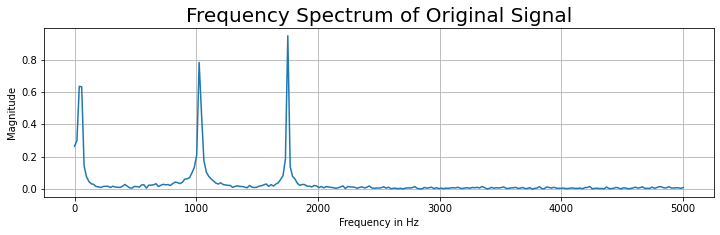

In [18]:
fig = plt.figure(figsize=(12, 18))
#Show spectrum of noisy input signal
Sigf =fft(Signal)### START CODE HERE ### (≈ 1 line of code)  ##Compute FFT of noisy signal
sub4 = plt.subplot(5, 1, 4)
xf = np.linspace(0.0, 1.0/(2.0*dt), (N_sample-1)//2)
sub4.plot(xf, 2.0/N_sample * np.abs(Sigf[0:(N_sample-1)//2]))
sub4.set_ylabel('Magnitude')
sub4.set_xlabel('Frequency in Hz')
sub4.set_title('Frequency Spectrum of Original Signal', fontsize=20)
sub4.grid()

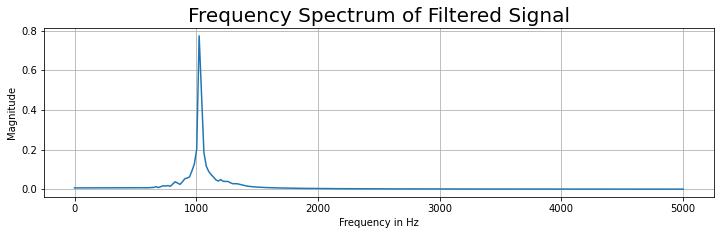

In [19]:
fig = plt.figure(figsize=(12, 18))
#Show spectrum of filtered output signal
Outf =fft(filtOut)### START CODE HERE ### (≈ 1 line of code)   ##Compute FFT of filtered signal
sub5 = plt.subplot(5, 1, 5)
xf = np.linspace(0.0, 1.0/(2.0*dt), (N_sample-1)//2)
sub5.plot(xf, 2.0/N_sample * np.abs(Outf[0:(N_sample-1)//2]))
sub5.set_ylabel('Magnitude')
sub5.set_xlabel('Frequency in Hz')
sub5.set_title('Frequency Spectrum of Filtered Signal', fontsize=20)
sub5.grid()